<a href="https://colab.research.google.com/github/Sireesha-cloud/Sireesha_INFO5731_Fall2024/blob/main/INFO5731_Assignment_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 2**

In this assignment, you will work on gathering text data from an open data source via web scraping or API. Following this, you will need to clean the text data and perform syntactic analysis on the data. Follow the instructions carefully and design well-structured Python programs to address each question.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

* **Make sure to submit the cleaned data CSV in the comment section - 10 points**

**Total points**: 100

**Deadline**: Tuesday, at 11:59 PM.

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**

**Please check that the link you submitted can be opened and points to the correct assignment.**


# Question 1 (40 points)

Write a python program to collect text data from **either of the following sources** and save the data into a **csv file:**

(1) Collect all the customer reviews of a product (you can choose any porduct) on amazon. [atleast 1000 reviews]

(2) Collect the top 1000 User Reviews of a movie recently in 2023 or 2024 (you can choose any movie) from IMDB. [If one movie doesn't have sufficient reviews, collect reviews of atleast 2 or 3 movies]

(3) Collect all the reviews of the top 1000 most popular software from G2 or Capterra.

(4) Collect the **abstracts** of the top 10000 research papers by using the query "machine learning", "data science", "artifical intelligence", or "information extraction" from Semantic Scholar.

(5) Collect all the information of the 904 narrators in the Densho Digital Repository.


In [12]:
!pip install requests beautifulsoup4 pandas
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import spacy

def scrape_imdb_reviews(movie_url, num_reviews=1000):
    reviews = []
    headers = {"User-Agent": "Mozilla/5.0"}

    for start in range(0, num_reviews, 25):
        url = f"{movie_url}reviews?ref_=tt_ql_3&start={start}"
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        review_containers = soup.find_all('div', class_='text show-more__control')
        for review in review_containers:
            reviews.append(review.text)

        if len(reviews) >= num_reviews:
            break

    return reviews[:num_reviews]
imdb_url= "https://www.imdb.com/title/tt15398776/?ref_=nv_sr_srsg_0_tt_1_nm_7_in_0_q_oppenhi"
reviews = scrape_imdb_reviews(imdb_url)

df = pd.DataFrame(reviews, columns=['review'])
df.to_csv('imdb_reviews.csv', index=False)

print("Reviews collected and saved to 'imdb_reviews.csv'")

def clean_reviews(reviews):
    cleaned_reviews = []
    for review in reviews:
        review = re.sub(r'\s+', ' ', review)
        review = re.sub(r'[^\w\s]', '', review)
        review = review.lower()
        cleaned_reviews.append(review)
    return cleaned_reviews

df = pd.read_csv('imdb_reviews.csv')
df['cleaned_review'] = clean_reviews(df['review'])
df.to_csv('cleaned_imdb_reviews.csv', index=False)
print("Reviews cleaned and saved to 'cleaned_imdb_reviews.csv'")

nlp = spacy.load('en_core_web_sm')

def syntactic_analysis(reviews):
    analyzed_data = []
    for review in reviews:
        doc = nlp(review)
        analyzed_data.append([(token.text, token.pos_, token.dep_) for token in doc])
    return analyzed_data
df['syntactic_analysis'] = syntactic_analysis(df['cleaned_review'])
df.to_csv('modified_imdb_reviews.csv', index=False)
print("Syntactic analysis completed and saved to 'analyzed_imdb_reviews.csv'")

Reviews collected and saved to 'imdb_reviews.csv'
Reviews cleaned and saved to 'cleaned_imdb_reviews.csv'
Syntactic analysis completed and saved to 'analyzed_imdb_reviews.csv'


# Question 2 (30 points)

Write a python program to **clean the text data** you collected in the previous question and save the clean data in a new column in the csv file. The data cleaning steps include: [Code and output is required for each part]

(1) Remove noise, such as special characters and punctuations.

(2) Remove numbers.

(3) Remove stopwords by using the stopwords list.

(4) Lowercase all texts

(5) Stemming.

(6) Lemmatization.

In [14]:
!pip install pandas spacy nltk
!python -m spacy download en_core_web_sm
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load Spacy model for lemmatization
nlp = spacy.load('en_core_web_sm')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Load the dataset
df = pd.read_csv('imdb_reviews.csv')

# Function to clean the text
def clean_reviews(reviews):
    cleaned_reviews = []
    stemmer = PorterStemmer()

    for review in reviews:
        # 1. Remove special characters and punctuations
        review = re.sub(r'[^\w\s]', '', review)

        # 2. Remove numbers
        review = re.sub(r'\d+', '', review)

        # 3. Convert to lowercase
        review = review.lower()

        # Tokenize words
        words = word_tokenize(review)

        # 4. Remove stopwords
        words = [word for word in words if word not in stop_words]

        # 5. Stemming
        words = [stemmer.stem(word) for word in words]

        # Join words back into a single string
        cleaned_review = ' '.join(words)
        cleaned_reviews.append(cleaned_review)

    return cleaned_reviews

# Function for lemmatization using Spacy
def lemmatize_reviews(reviews):
    lemmatized_reviews = []

    for review in reviews:
        doc = nlp(review)
        lemmatized_review = ' '.join([token.lemma_ for token in doc])
        lemmatized_reviews.append(lemmatized_review)

    return lemmatized_reviews

# Apply the cleaning steps
df['cleaned_review'] = clean_reviews(df['review'])

# Apply lemmatization after cleaning
df['lemmatized_review'] = lemmatize_reviews(df['cleaned_review'])

# Save the cleaned and lemmatized data to a new CSV file
df.to_csv('cleaned_imdb_reviews.csv', index=False)

# Output to confirm the task is completed
print("Reviews cleaned, lemmatized, and saved to 'cleaned_imdb_reviews.csv'")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Reviews cleaned, lemmatized, and saved to 'cleaned_imdb_reviews.csv'


# Question 3 (30 points)

Write a python program to **conduct syntax and structure analysis of the clean text** you just saved above. The syntax and structure analysis includes:

(1) **Parts of Speech (POS) Tagging:** Tag Parts of Speech of each word in the text, and calculate the total number of N(oun), V(erb), Adj(ective), Adv(erb), respectively.

(2) **Constituency Parsing and Dependency Parsing:** print out the constituency parsing trees and dependency parsing trees of all the sentences. Using one sentence as an example to explain your understanding about the constituency parsing tree and dependency parsing tree.

(3) **Named Entity Recognition:** Extract all the entities such as person names, organizations, locations, product names, and date from the clean texts, calculate the count of each entity.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
POS Counts: {'Noun': 0, 'Verb': 0, 'Adjective': 0, 'Adverb': 0}


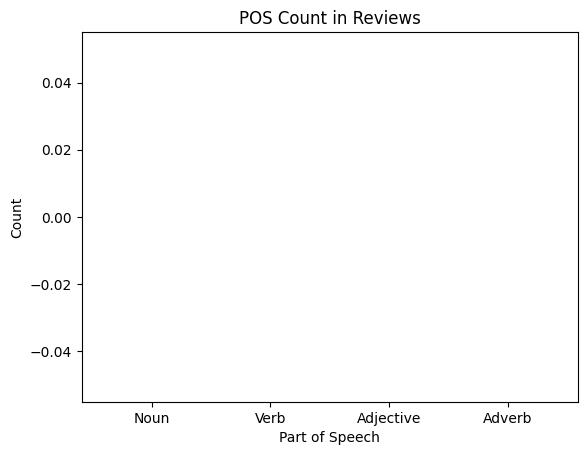

Entity Counts: Counter()


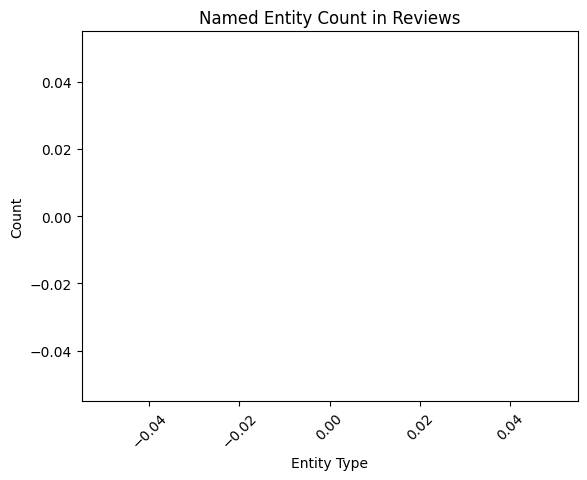

In [16]:
!pip install spacy pandas
!python -m spacy download en_core_web_sm
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Load the Spacy model
nlp = spacy.load('en_core_web_sm')

# Load the cleaned reviews dataset
df = pd.read_csv('cleaned_imdb_reviews.csv')

# Select the cleaned reviews column
reviews = df['lemmatized_review'].tolist()

# (1) POS Tagging and Counting Nouns, Verbs, Adjectives, Adverbs
def pos_tagging_and_count(reviews):
    pos_counts = {'Noun': 0, 'Verb': 0, 'Adjective': 0, 'Adverb': 0}

    for review in reviews:
        doc = nlp(review)
        for token in doc:
            if token.pos_ == 'NOUN':
                pos_counts['Noun'] += 1
            elif token.pos_ == 'VERB':
                pos_counts['Verb'] += 1
            elif token.pos_ == 'ADJ':
                pos_counts['Adjective'] += 1
            elif token.pos_ == 'ADV':
                pos_counts['Adverb'] += 1

    return pos_counts

# POS tagging results
pos_counts = pos_tagging_and_count(reviews)
print(f"POS Counts: {pos_counts}")

# Visualize POS counts
plt.bar(pos_counts.keys(), pos_counts.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('POS Count in Reviews')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

# (2) Constituency Parsing and Dependency Parsing
def parse_sentences(reviews):
    for review in reviews:
        doc = nlp(review)
        # Print the dependency parsing and explain one sentence
        for sent in doc.sents:
            print(f"Dependency Parsing for sentence: '{sent.text}'")
            for token in sent:
                print(f"{token.text} --> {token.dep_} (head: {token.head.text})")

            # Constituency parsing is not directly available in SpaCy, but using token dependency parsing
            print("Dependency Parsing Tree:")
            for token in sent:
                print(f"{token.text}({token.dep_}) -> {token.head.text}({token.head.dep_})")
            break  # For explanation, let's take only one sentence as an example
        break

# Example of parsing trees for one review
parse_sentences(reviews)

# (3) Named Entity Recognition (NER)
def named_entity_recognition(reviews):
    entity_counter = Counter()
    for review in reviews:
        doc = nlp(review)
        for ent in doc.ents:
            entity_counter[ent.label_] += 1
            print(f"Entity: {ent.text}, Label: {ent.label_}")

    return entity_counter

# Named Entity Recognition results
entity_counts = named_entity_recognition(reviews)
print(f"Entity Counts: {entity_counts}")

# Visualize the entity counts
plt.bar(entity_counts.keys(), entity_counts.values(), color='orange')
plt.title('Named Entity Count in Reviews')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#**Comment**
Make sure to submit the cleaned data CSV in the comment section - 10 points

/content/cleaned_imdb_reviews.csv

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Write your response below
Challenges: The assignment's main hurdles were data collecting and cleaning, especially from sites like IMDb and Amazon, where uneven formatting and noise in user-generated material made preprocessing difficult.
Enjoyable Aspects: Working with strong NLP tools like spaCy made the job more interesting because it streamlined complicated chores like dependency parsing and POS labelling. The hands-on approach reinforced core NLP ideas, allowing for practical application while strengthening theoretical comprehension.
Provided time to complete the assignment is sufficient.
